In [2]:
import numpy as np
import otmol as otm
import pandas as pd
from openbabel import pybel
import matplotlib.pyplot as plt
import seaborn as sns
import os
from rdkit.Chem import MolFromPDBFile
from experiment_utils import interactive_alignment_plot_py3dmol
# %matplotlib widget

In [ ]:
data_path = "../Data/first_8_molecules_RDKIT"
lig_list = ['1ln1_DLP', '4csv_imatinib', '5bvs_EIC', '6ln3_ATP', '6y13_stapledHelix', '8w4x_BGC', '8w4x_BGCGLC', '215d_DNA']
for ligand in lig_list:
    result = []
    for i in range(50):
        path1 = os.path.join(data_path, 'extra_bio_ligands', ligand+'.pdb')
        path2 = os.path.join(data_path, 'extra_bio_ligands_RDKIT', ligand, ligand+'_conf'+str(i)+'.pdb')
        X_A, T_A, B_A = otm.tl.parse_pdb_file(path1)
        X_B, T_B, B_B = otm.tl.parse_pdb_file(path2)
        optimal_assignment, rmsd_best, alpha_best, BCI = otm.tl.molecule_alignment(
            X_A, X_B, T_A, T_B, B_A, B_B, alpha_list= np.arange(0, 1, 0.01)[1:], cst_D = 1, minimize_mismatched_edges=True)  
        print(ligand, i, rmsd_best, BCI)
        result.append({
            'nameA': ligand,
            'nameB': ligand+'_conf'+str(i),
            'RMSD(OTMol)': rmsd_best,
            'alpha': alpha_best,
            '# mismatched bond': BCI,
            'assignment': optimal_assignment,
        })
    pd.DataFrame(result).to_csv(('./otmol_output/{}_result.csv'.format(ligand)), index=False)

1ln1_DLP 0 4.956857268685251 0
1ln1_DLP 1 6.503685949725692 0
1ln1_DLP 2 5.535330369384248 0
1ln1_DLP 3 4.509755357300606 0
1ln1_DLP 4 4.4191377769940345 0
1ln1_DLP 5 4.122663108359444 0
1ln1_DLP 6 4.73974477163613 0
1ln1_DLP 7 4.186053200045016 0
1ln1_DLP 8 4.538813968105411 0
1ln1_DLP 9 5.424869718186608 0
1ln1_DLP 10 6.096154588901272 0
1ln1_DLP 11 5.5574600610245275 0
1ln1_DLP 12 5.056865452738485 0
1ln1_DLP 13 4.737721249561265 0
1ln1_DLP 14 6.354480638468658 0
1ln1_DLP 15 4.3455852736335885 0
1ln1_DLP 16 4.588761890805901 0
1ln1_DLP 17 4.680965486365404 0
1ln1_DLP 18 5.629919631228522 0
1ln1_DLP 19 4.832911539227641 0
1ln1_DLP 20 6.418271732466377 0
1ln1_DLP 21 5.938823528683873 0
1ln1_DLP 22 5.613288207419579 0
1ln1_DLP 23 5.64728330219514 0
1ln1_DLP 24 4.9864470416995115 0
1ln1_DLP 25 4.832693993725014 0
1ln1_DLP 26 3.539573607975705 0
1ln1_DLP 27 4.794511908788518 0
1ln1_DLP 28 5.3598138362428696 0
1ln1_DLP 29 5.736881369286873 0
1ln1_DLP 30 3.89384290808997 0
1ln1_DLP 31 6.27

In [3]:
data_path = "../Data/first_8_molecules_RDKIT"
lig_list = ['1ln1_DLP', '4csv_imatinib', '5bvs_EIC', '6ln3_ATP', '6y13_stapledHelix', '8w4x_BGC', '8w4x_BGCGLC', '215d_DNA']
for ligand in lig_list:
    df = pd.read_csv('./otmol_output/{}_result.csv'.format(ligand))
    print(ligand, np.all(df['# mismatched bond'] == 0))

1ln1_DLP True
4csv_imatinib True
5bvs_EIC True
6ln3_ATP True
6y13_stapledHelix True
8w4x_BGC True
8w4x_BGCGLC True
215d_DNA True


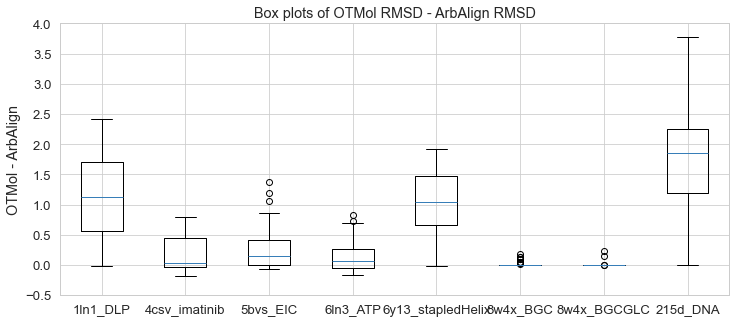

In [29]:
DLP_arbalign = pd.read_csv('./arbalign_output/1ln1_DLP_result.csv')['RMSD(ArbAlign)']
imatinib_arbalign = pd.read_csv('./arbalign_output/4csv_imatinib_result.csv')['RMSD(ArbAlign)']
EIC_arbalign = pd.read_csv('./arbalign_output/5bvs_EIC_result.csv')['RMSD(ArbAlign)']
ATP_arbalign = pd.read_csv('./arbalign_output/6ln3_ATP_result.csv')['RMSD(ArbAlign)']
stapledHelix_arbalign = pd.read_csv('./arbalign_output/6y13_stapledHelix_result.csv')['RMSD(ArbAlign)']
BGC_arbalign = pd.read_csv('./arbalign_output/8w4x_BGC_result.csv')['RMSD(ArbAlign)']
BGCGLC_arbalign = pd.read_csv('./arbalign_output/8w4x_BGCGLC_result.csv')['RMSD(ArbAlign)']
DNA_arbalign = pd.read_csv('./arbalign_output/215d_DNA_result.csv')['RMSD(ArbAlign)']

DLP_otmol = pd.read_csv('./otmol_output/1ln1_DLP_result.csv')['RMSD(OTMol)']
imatinib_otmol = pd.read_csv('./otmol_output/4csv_imatinib_result.csv')['RMSD(OTMol)']
EIC_otmol = pd.read_csv('./otmol_output/5bvs_EIC_result.csv')['RMSD(OTMol)']
ATP_otmol = pd.read_csv('./otmol_output/6ln3_ATP_result.csv')['RMSD(OTMol)']
stapledHelix_otmol = pd.read_csv('./otmol_output/6y13_stapledHelix_result.csv')['RMSD(OTMol)']
BGC_otmol = pd.read_csv('./otmol_output/8w4x_BGC_result.csv')['RMSD(OTMol)']
BGCGLC_otmol = pd.read_csv('./otmol_output/8w4x_BGCGLC_result.csv')['RMSD(OTMol)']
DNA_otmol = pd.read_csv('./otmol_output/215d_DNA_result.csv')['RMSD(OTMol)']

DLP_diff = DLP_otmol - DLP_arbalign
imatinib_diff = imatinib_otmol - imatinib_arbalign
EIC_diff = EIC_otmol - EIC_arbalign
ATP_diff = ATP_otmol - ATP_arbalign
stapledHelix_diff = stapledHelix_otmol - stapledHelix_arbalign
BGC_diff = BGC_otmol - BGC_arbalign
BGCGLC_diff = BGCGLC_otmol - BGCGLC_arbalign
DNA_diff = DNA_otmol - DNA_arbalign

all_data = [
    DLP_diff, imatinib_diff, EIC_diff, ATP_diff, 
    stapledHelix_diff, BGC_diff, BGCGLC_diff, DNA_diff
]
labels = [
    '1ln1_DLP', '4csv_imatinib', '5bvs_EIC', '6ln3_ATP', 
    '6y13_stapledHelix', '8w4x_BGC', '8w4x_BGCGLC', '215d_DNA'
]

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("Set1") 
fig, ax = plt.subplots(figsize=(12, 5))
#plt.rcParams.update({'font.size': 12})  # Adjust the number to your desired size
ax.set_title('Box plots of OTMol RMSD - ArbAlign RMSD')
ax.set_ylim(-0.5, 4)
ax.boxplot(all_data)
ax.set_xticks(
    [y + 1 for y in range(len(all_data))],
    labels=['1ln1_DLP', '4csv_imatinib', '5bvs_EIC', '6ln3_ATP', '6y13_stapledHelix', '8w4x_BGC', '8w4x_BGCGLC', '215d_DNA']
)
ax.set_ylabel('OTMol - ArbAlign')
ax.yaxis.grid(True)
plt.savefig('../images/boxplot_arbalign_bio.png', dpi=300, bbox_inches='tight')
plt.show()

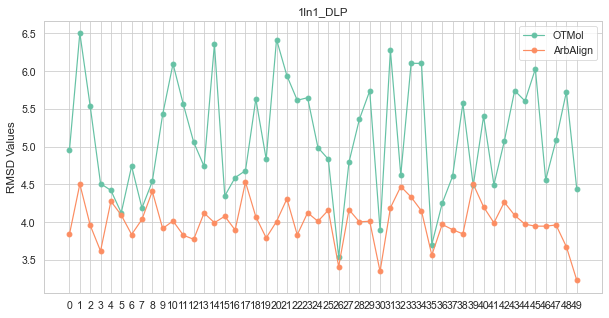

In [17]:
arbalign_res = pd.read_csv('./arbalign_output/1ln1_DLP_result.csv')
otmol_res = pd.read_csv('./otmol_output/1ln1_DLP_result.csv')

combined_df = pd.concat([
    arbalign_res.rename(columns={'RMSD(ArbAlign)': 'ArbAlign'}), 
    otmol_res.rename(columns={'RMSD(OTMol)': 'OTMol'}), 
    ], axis=1)
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.2)
sns.set_palette("Set2")
plt.plot(range(0,50), combined_df["OTMol"], marker='o', label="OTMol", clip_on=False, zorder=10)
plt.plot(range(0,50), combined_df["ArbAlign"], marker='o', label="ArbAlign", clip_on=False, zorder=10)
plt.title("1ln1_DLP")
plt.xlabel("")
plt.ylabel("RMSD Values")
#plt.ylim(0, 2)
plt.xticks(range(0,50))
#plt.xlim(2,20)
plt.legend()
plt.grid(True)
#plt.savefig('../images/S1MAW1_element_name.png', dpi=300, bbox_inches='tight')

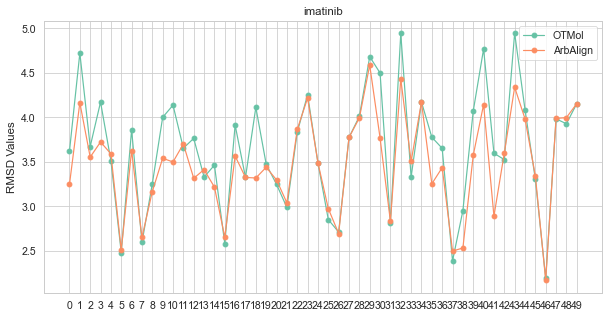

In [6]:
arbalign_res = pd.read_csv('./arbalign_output/4csv_imatinib_result.csv')
otmol_res = pd.read_csv('./otmol_output/4csv_imatinib_result.csv')

combined_df = pd.concat([
    arbalign_res.rename(columns={'RMSD(ArbAlign)': 'ArbAlign'}), 
    otmol_res.rename(columns={'RMSD(OTMol)': 'OTMol'}), 
    ], axis=1)
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.2)
sns.set_palette("Set2")
plt.plot(range(0,50), combined_df["OTMol"], marker='o', label="OTMol", clip_on=False, zorder=10)
plt.plot(range(0,50), combined_df["ArbAlign"], marker='o', label="ArbAlign", clip_on=False, zorder=10)
plt.title("imatinib")
plt.xlabel("")
plt.ylabel("RMSD Values")
#plt.ylim(0, 2)
plt.xticks(range(0,50))
#plt.xlim(2,20)
plt.legend()
plt.grid(True)
#plt.savefig('../images/S1MAW1_element_name.png', dpi=300, bbox_inches='tight')

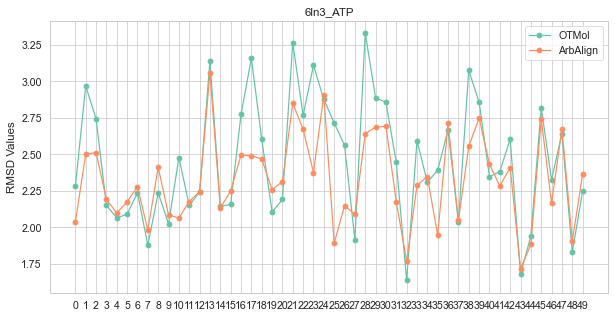

In [3]:
arbalign_res = pd.read_csv('./arbalign_output/6ln3_ATP_result.csv')
otmol_res = pd.read_csv('./otmol_output/6ln3_ATP_result.csv')

combined_df = pd.concat([
    arbalign_res.rename(columns={'RMSD(ArbAlign)': 'ArbAlign'}), 
    otmol_res.rename(columns={'RMSD(OTMol)': 'OTMol'}), 
    ], axis=1)
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.2)
sns.set_palette("Set2")
plt.plot(range(0,50), combined_df["OTMol"], marker='o', label="OTMol", clip_on=False, zorder=10)
plt.plot(range(0,50), combined_df["ArbAlign"], marker='o', label="ArbAlign", clip_on=False, zorder=10)
plt.title("6ln3_ATP")
plt.xlabel("")
plt.ylabel("RMSD Values")
#plt.ylim(0, 2)
plt.xticks(range(0,50))
#plt.xlim(2,20)
plt.legend()
plt.grid(True)
#plt.savefig('../images/S1MAW1_element_name.png', dpi=300, bbox_inches='tight')

OTMol alignment

In [18]:
df = pd.read_csv('./otmol_output/1ln1_DLP_result.csv')
data_path = "../Data/first_8_molecules_RDKIT"
ligand = '1ln1_DLP'
i = 49
nameB = ligand+'_conf'+str(i)+'_otmol.xyz'
path1 = os.path.join(data_path, 'extra_bio_ligands', ligand+'.pdb')
path2 = os.path.join(data_path, 'extra_bio_ligands_RDKIT', ligand, ligand+'_conf'+str(i)+'.pdb')
X_A, T_A, B_A = otm.tl.parse_pdb_file(path1)
X_B, T_B, B_B = otm.tl.parse_pdb_file(path2)
assignment = [int(x) for x in df['assignment'][i].strip('[]').split()]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, _, _ = otm.tl.kabsch(X_A, X_B, P) 
otm.tl.write_xyz_with_custom_labels(
    os.path.join('otmol_output', nameB), 
    X_B_aligned[assignment], 
    T_B[assignment],
    comment="aligned by OTMol")
print(otm.tl.root_mean_square_deviation(X_A, X_B_aligned[assignment]))
otm.pl.interactive_alignment_plot(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '')

4.439099855498052


In [8]:
df = pd.read_csv('./otmol_output/4csv_imatinib_result.csv')
data_path = "../Data/first_8_molecules_RDKIT"
ligand = '4csv_imatinib'
i = 10
nameB = ligand+'_conf'+str(i)+'_otmol.xyz'
path1 = os.path.join(data_path, 'extra_bio_ligands', ligand+'.pdb')
path2 = os.path.join(data_path, 'extra_bio_ligands_RDKIT', ligand, ligand+'_conf'+str(i)+'.pdb')
X_A, T_A, B_A = otm.tl.parse_pdb_file(path1)
X_B, T_B, B_B = otm.tl.parse_pdb_file(path2)
assignment = [int(x) for x in df['assignment'][i].strip('[]').split()]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, _, _ = otm.tl.kabsch(X_A, X_B, P) 
otm.tl.write_xyz_with_custom_labels(
    os.path.join('otmol_output', nameB), 
    X_B_aligned[assignment], 
    T_B[assignment],
    comment="aligned by OTMol")
otm.pl.interactive_alignment_plot(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '')

In [4]:
df = pd.read_csv('./otmol_output/6ln3_ATP_result.csv')
data_path = "../Data/first_8_molecules_RDKIT"
ligand = '6ln3_ATP'
i = 28
nameB = ligand+'_conf'+str(i)+'_otmol.xyz'
path1 = os.path.join(data_path, 'extra_bio_ligands', ligand+'.pdb')
path2 = os.path.join(data_path, 'extra_bio_ligands_RDKIT', ligand, ligand+'_conf'+str(i)+'.pdb')
X_A, T_A, B_A = otm.tl.parse_pdb_file(path1)
X_B, T_B, B_B = otm.tl.parse_pdb_file(path2)
assignment = [int(x) for x in df['assignment'][i].strip('[]').split()]
P = otm.tl.permutation_to_matrix(assignment)
X_B_aligned, _, _ = otm.tl.kabsch(X_A, X_B, P) 
otm.tl.write_xyz_with_custom_labels(
    os.path.join('otmol_output', nameB), 
    X_B_aligned[assignment], 
    T_B[assignment],
    comment="aligned by OTMol")
print(otm.tl.root_mean_square_deviation(X_A, X_B_aligned[assignment]))
otm.pl.interactive_alignment_plot(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '', '')

3.3294419496301986


ArbAlign alignment

In [19]:
data_path = "../Data/first_8_molecules_RDKIT"
ligand = '1ln1_DLP'
i = 49
nameB = ligand+'_conf'+str(i)+'_arbalign.xyz'
path1 = os.path.join(data_path, 'extra_bio_ligands', ligand+'.xyz')
path2 = os.path.join('arbalign_output', ligand+'_conf'+str(i)+'-aligned_to-'+ligand+'.xyz')
molA = next(pybel.readfile("xyz", path1))
molB = next(pybel.readfile("xyz", path2))
X_A, T_A, B_A = otm.tl.process_molecule(molA, heavy_atoms_only=True) 
X_B, T_B, B_B = otm.tl.process_molecule(molB, heavy_atoms_only=True)
X_B_aligned, _, _ = otm.tl.kabsch(X_A, X_B, np.eye(X_A.shape[0]))
otm.tl.write_xyz_with_custom_labels(
    os.path.join('arbalign_output', nameB), 
    X_B_aligned, 
    T_B,
    comment="aligned by ArbAlign")
print(otm.tl.root_mean_square_deviation(X_A, X_B_aligned))
otm.pl.interactive_alignment_plot(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment=np.arange(X_A.shape[0]))

3.230120920396313


In [15]:
data_path = "../Data/first_8_molecules_RDKIT"
ligand = '4csv_imatinib'
i = 10
nameB = ligand+'_conf'+str(i)+'_arbalign.xyz'
path1 = os.path.join(data_path, 'extra_bio_ligands', ligand+'.xyz')
path2 = os.path.join('arbalign_output', ligand+'_conf'+str(i)+'-aligned_to-'+ligand+'.xyz')
molA = next(pybel.readfile("xyz", path1))
molB = next(pybel.readfile("xyz", path2))
X_A, T_A, B_A = otm.tl.process_molecule(molA, heavy_atoms_only=True) 
X_B, T_B, B_B = otm.tl.process_molecule(molB, heavy_atoms_only=True)
X_B_aligned, _, _ = otm.tl.kabsch(X_A, X_B, np.eye(X_A.shape[0]))
otm.tl.write_xyz_with_custom_labels(
    os.path.join('arbalign_output', nameB), 
    X_B_aligned, 
    T_B,
    comment="aligned by ArbAlign")
print(otm.tl.root_mean_square_deviation(X_A, X_B_aligned))
otm.pl.interactive_alignment_plot(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment=np.arange(X_A.shape[0]))

3.4951439345926163


In [5]:
data_path = "../Data/first_8_molecules_RDKIT"
ligand = '6ln3_ATP'
i = 28
nameB = ligand+'_conf'+str(i)+'_arbalign.xyz'
path1 = os.path.join(data_path, 'extra_bio_ligands', ligand+'.xyz')
path2 = os.path.join('arbalign_output', ligand+'_conf'+str(i)+'-aligned_to-'+ligand+'.xyz')
molA = next(pybel.readfile("xyz", path1))
molB = next(pybel.readfile("xyz", path2))
X_A, T_A, B_A = otm.tl.process_molecule(molA, heavy_atoms_only=True) 
X_B, T_B, B_B = otm.tl.process_molecule(molB, heavy_atoms_only=True)
X_B_aligned, _, _ = otm.tl.kabsch(X_A, X_B, np.eye(X_A.shape[0]))
otm.tl.write_xyz_with_custom_labels(
    os.path.join('arbalign_output', nameB), 
    X_B_aligned, 
    T_B,
    comment="aligned by ArbAlign")
print(otm.tl.root_mean_square_deviation(X_A, X_B_aligned))
otm.pl.interactive_alignment_plot(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment=np.arange(X_A.shape[0]))

2.6418129089242823


misc experiment

ArbAlign alignment